<a href="https://colab.research.google.com/github/saiayush247/deep/blob/main/Train_a_neural_network_to_recognize_digits(0_9)_from_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow numpy matplotlib

In [2]:
import tensorflow as tf  # Deep Learning framework
from tensorflow import keras  # Helps build models easily
import numpy as np  # Handles numerical data
import matplotlib.pyplot as plt  # For visualization


In [3]:
# Load the dataset directly from Keras
mnist = keras.datasets.mnist

# Split into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


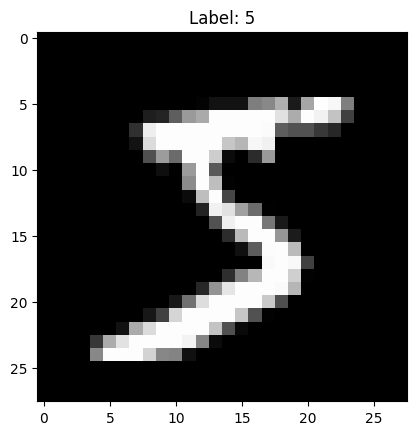

In [4]:
# Show the first image in the training set
plt.imshow(x_train[0], cmap="gray")  # Display image in grayscale
plt.title(f"Label: {y_train[0]}")  # Show the label
plt.show()


In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Convert 2D image to 1D
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8832 - loss: 0.4253
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9636 - loss: 0.1215
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9766 - loss: 0.0792
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9833 - loss: 0.0564
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9874 - loss: 0.0431


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9736 - loss: 0.0851

Test Accuracy: 97.73%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


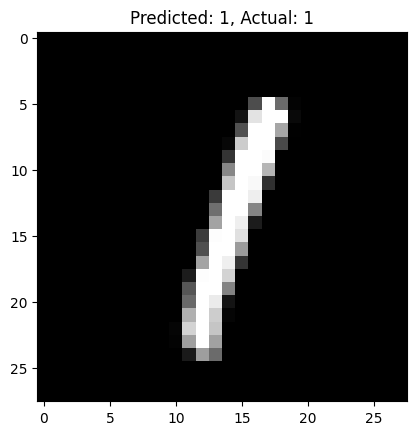

In [10]:
predictions = model.predict(x_test)

# Show an image
index = 5  # Change this to test different images
plt.imshow(x_test[index], cmap="gray")
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
plt.show()
